In [1]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import IterativeImputer

In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
from scripts.database_connection import *
from scripts.data_processing import *

In [4]:
# Load the data from the database
df = load_data()

Successfully connected to the database.
Successfully loaded 150001 records.


In [5]:
df.head()

Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   
2                D42335A  ...          19725661.0          14699576.0   
3                T21824A  ...          21388122.0          15146643.0   
4                D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

In [6]:
# tellco data field descriptions
df_field_desc = pd.read_excel("../data/data/Field Descriptions.xlsx")

df_field_desc

Fields  \
0                                  bearer id   
1                                  Dur. (ms)   
2                                      Start   
3                                   Start ms   
4                                        End   
5                                     End ms   
6                                   Dur. (s)   
7                                       IMSI   
8                              MSISDN/Number   
9                                       IMEI   
10                        Last Location Name   
11                           Avg RTT DL (ms)   
12                           Avg RTT UL (ms)   
13                   Avg Bearer TP DL (kbps)   
14                   Avg Bearer TP UL (kbps)   
15               TCP DL Retrans. Vol (Bytes)   
16               TCP UL Retrans. Vol (Bytes)   
17                       DL TP < 50 Kbps (%)   
18            50 Kbps < DL TP < 250 Kbps (%)   
19             250 Kbps < DL TP < 1 Mbps (%)   
20                        DL TP > 1 Mbps (%)   
21                       UL TP < 10 Kbps (%)   
22             10 Kbps < UL TP < 50 Kbps (%)   
23            50 Kbps < UL TP < 300 Kbps (%)   
24                      UL TP > 300 Kbps (%)   
25                           HTTP DL (Bytes)   
26                           HTTP UL (Bytes)   
27                 Activity Duration DL (ms)   
28                 Activity Duration UL (ms)   
29                               Dur. (ms).1   
30                      Handset Manufacturer   
31                              Handset Type   
32           Nb of sec with 125000B < Vol DL   
33     Nb of sec with 1250B < Vol UL < 6250B   
34  Nb of sec with 31250B < Vol DL < 125000B   
35            Nb of sec with 37500B < Vol UL   
36    Nb of sec with 6250B < Vol DL < 31250B   
37    Nb of sec with 6250B < Vol UL < 37500B   
38             Nb of sec with Vol DL < 6250B   
39             Nb of sec with Vol UL < 1250B   
40                   Social Media DL (Bytes)   
41                   Social Media UL (Bytes)   
42                        YouTube DL (Bytes)   
43                        YouTube UL (Bytes)   
44                        Netflix DL (Bytes)   
45                        Netflix UL (Bytes)   
46                         Google DL (Bytes)   
47                         Google UL (Bytes)   
48                          Email DL (Bytes)   
49                          Email UL (Bytes)   
50                         Gaming DL (Bytes)   
51                         Gaming UL (Bytes)   
52                                  Other DL   
53                                  Other UL   
54                          Total DL (Bytes)   
55                          Total UL (Bytes)   

                                          Description  
0                              xDr session identifier  
1                   Total Duration of the xDR (in ms)  
2       Start time of the xDR (first frame timestamp)  
3   Milliseconds offset of start time for the xDR ...  
4          End time of the xDR (last frame timestamp)  
5   Milliseconds offset of end time of the xDR (la...  
6                    Total Duration of the xDR (in s)  
7            International Mobile Subscriber Identity  
8   MS International PSTN/ISDN Number of mobile - ...  
9             International Mobile Equipment Identity  
10  User location call name (2G/3G/4G) at the end ...  
11  Average Round Trip Time measurement Downlink d...  
12  Average Round Trip Time measurement Uplink dir...  
13  Average Bearer Throughput for Downlink (kbps) ...  
14  Average Bearer Throughput for uplink (kbps) - ...  
15  TCP volume of Downlink packets detected as ret...  
16  TCP volume of Uplink packets detected as retra...  
17  Duration ratio when Bearer Downlink Throughput...  
18  Duration ratio when Bearer Downlink Throughput...  
19  Duration ratio when Bearer Downlink Throughput...  
20  Duration ratio when Bearer Downlink Throughput...  
21  Duration ratio when Bearer Uplink Throughput < ….  
22  Duration 

In [7]:
#  size of the data
df.shape

(150001, 55)

### Basic Statistical Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [9]:
# descriptive stastics
df.describe()

Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.490100e+05  150000.000000  150000.000000  1.500000e+05  1.494310e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.893173e+18     288.611834     288.097653  8.103762e+04  2.148809e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744050e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324302e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.489350e+05  1.494290e+05    122172.000000    122189.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.447443e+12  2.241637e+13       619.782739        84.793524   
min     3.360100e+10  4.400152e+11         0.000000         0.000000   
25%     3.365130e+10  3.546071e+13        32.000000         2.000000   
50%     3.366371e+10  3.572201e+13        45.000000         5.000000   
75%     3.368349e+10  8.611970e+13        70.000000        15.000000   
max     8.823971e+14  9.900120e+13     96923.000000      7120.000000   

       Avg Bearer TP DL (kbps)  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
count            150000.000000  ...        1.500010e+05        1.500010e+05   
mean              13300.045927  ...        1.163407e+07        1.100941e+07   
std               23971.878541  ...        6.710569e+06        6.345423e+06   
min                   0.000000  ...        5.300000e+01        1.050000e+02   
25%                  43.000000  ...        5.833501e+06        5.517965e+06   
50%                  63.000000  ...        1.161602e+07        1.101345e+07   
75%               19710.750000  ...        1.744852e+07        1.651556e+07   
max              378160.000000  ...        2.325910e+07        2.201196e+07   

       Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
count        1.500010e+05        1.500010e+05       1.500010e+05   
mean         1.162685e+07        1.100175e+07       4.220447e+08   
std          6.725218e+06        6.359490e+06       2.439675e+08   
min          4.200000e+01        3.500000e+01       2.516000e+03   
25%          5.777156e+06        5.475981e+06       2.104733e+08   
50%          1.164222e+07        1.099638e+07       4.234081e+08   
75%          1.747048e+07        1.650727e+07       6.331742e+08   
max          2.325919e+07        2.201196e+07       8.434419e+08   

       Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
count       1.500010e+05      1.500010e+05      1.500010e+05   
mean        8.288398e+06      4.211005e+08      8.264799e+06   
std         4.782700e+06      2.432050e+08      4.769004e+06   
min         5.900000e+01      3.290000e+03      1.480000e+02   
25%         4.128476e+06      2.101869e+08      4.145943e+06   
50%         8.291208e+06      4.218030e+08      8.267071e+06   
75%         1.243162e+07      6.316918e+08      1.238415e+07   
max         1.655879e+07      8.434425e+08      1.655882e+07   

       Total UL (Bytes)  Total DL (Bytes)  
count      1.500000e+05      1.500000e+05  
mean       4.112121e+07      4.546434e+08  
std        1.127639e+07      2.441429e+08  
min        2.866892e+06      7.114041e+06  
25%        3.322201e+07      2.431068e+08  
50%        4.114331e+07      4.558411e+08  
75%        4.903424e+07      6.657055e+08  
max        7.833131e+07      9.029696e+08  

[8 rows x 50 columns]

In [10]:
# check for missing values 
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [11]:
# percentage of missing values 
calculate_missing_percentage(df)

The dataset has 12.5% missing values.


In [12]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")


Number of duplicate rows: 0


In [13]:
# total missing values and it's percentage 
display_missing_values(df)

The dataframe contains 55 columns.
41 columns have missing values.


Missing Values  % of Total Values  \
Nb of sec with 37500B < Vol UL                    130254              86.84   
Nb of sec with 6250B < Vol UL < 37500B            111843              74.56   
Nb of sec with 125000B < Vol DL                    97538              65.02   
TCP UL Retrans. Vol (Bytes)                        96649              64.43   
Nb of sec with 31250B < Vol DL < 125000B           93586              62.39   
Nb of sec with 1250B < Vol UL < 6250B              92894              61.93   
Nb of sec with 6250B < Vol DL < 31250B             88317              58.88   
TCP DL Retrans. Vol (Bytes)                        88146              58.76   
HTTP UL (Bytes)                                    81810              54.54   
HTTP DL (Bytes)                                    81474              54.32   
Avg RTT DL (ms)                                    27829              18.55   
Avg RTT UL (ms)                                    27812              18.54   
Last Location Name                                  1153               0.77   
MSISDN/Number                                       1066               0.71   
Bearer Id                                            991               0.66   
Nb of sec with Vol UL < 1250B                        793               0.53   
UL TP < 10 Kbps (%)                                  792               0.53   
50 Kbps < UL TP < 300 Kbps (%)                       792               0.53   
UL TP > 300 Kbps (%)                                 792               0.53   
10 Kbps < UL TP < 50 Kbps (%)                        792               0.53   
Nb of sec with Vol DL < 6250B                        755               0.50   
DL TP > 1 Mbps (%)                                   754               0.50   
50 Kbps < DL TP < 250 Kbps (%)                       754               0.50   
250 Kbps < DL TP < 1 Mbps (%)                        754               0.50   
DL TP < 50 Kbps (%)                                  754               0.50   
Handset Manufacturer                                 572               0.38   
Handset Type                                         572               0.38   
IMEI                                                 572               0.38   
IMSI                                                 570               0.38   
Start                                                  1               0.00   
Start ms                                               1               0.00   
End                                                    1               0.00   
End ms                                                 1               0.00   
Dur. (ms)                                              1               0.00   
Avg Bearer TP UL (kbps)                                1               0.00   
Avg Bearer TP DL (kbps)                                1               0.00   
Dur. (ms).1                                            1               0.00   
Activity Duration UL (ms)                              1               0.00   
Activity Duration DL (ms)                              1               0.00   
Total UL (Bytes)                                       1               0.00   
Total DL (Bytes)                                       1               0.00   

                                         Data Type  
Nb of sec with 37500B < Vol UL             float64  
Nb of sec with 6250B < Vol UL < 37500B     float64  
Nb of sec with 125000B < Vol DL            float64  
TCP UL Retrans. Vol (Bytes)                float64  
Nb of sec with 31250B < Vol DL < 125000B   float64  
Nb of sec with 1250B < Vol UL < 6250B      float64  
Nb of sec with 6250B < Vol DL < 31250B     float64  
TCP DL Retrans. Vol (Bytes)                float64  
HTTP UL (Bytes)                            float64  
HTTP DL (Bytes)                            float64  
Avg RTT DL (ms)                            float64  
Avg RTT UL (ms)                            float64  
Last Location Name                

The above table presents a summary of missing data for various columns in a dataset. 

## Handling Missing Values

for Categorical columns ('Last Location Name', 'Handset Manufacturer', 'Handset Type') I used mode imputation (most frequent value) as these are likely to be categorical variables where mean or median imputation wouldn't make sense.

In [14]:
# Handle categorical columns
categorical_columns = ['Last Location Name', 'Handset Manufacturer', 'Handset Type']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values after handling categorical columns:")
print(df[categorical_columns].isnull().sum())

Missing values after handling categorical columns:
Last Location Name      0
Handset Manufacturer    0
Handset Type            0
dtype: int64


In [15]:
# Encode categorical variables - convert the object types to str type
for col in categorical_columns:
    df[col] = (df[col].astype('string'))
    
print(df[categorical_columns].head())

      Last Location Name Handset Manufacturer                 Handset Type
0  9.16456699548519E+015              Samsung   Samsung Galaxy A5 Sm-A520F
1                L77566A              Samsung  Samsung Galaxy J5 (Sm-J530)
2                D42335A              Samsung     Samsung Galaxy A8 (2018)
3                T21824A            undefined                    undefined
4                D88865A              Samsung             Samsung Sm-G390F


For columns with very few missing values (<1%), I used mean imputation as it's computationally efficient and won't significantly affect the distribution for such a small percentage.

In [16]:
# Handle numeric columns with low missing values
numeric_columns = df.select_dtypes(include=['float64']).columns
for col in numeric_columns:
    if df[col].isnull().sum() / len(df) < 0.01:
        df[col] = df[col].fillna(df[col].mean())

print("\nMissing values in numeric columns after handling low-missing columns:")
print(df[numeric_columns].isnull().sum())


Missing values in numeric columns after handling low-missing columns:
Bearer Id                                        0
Start ms                                         0
End ms                                           0
Dur. (ms)                                        0
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                              0
50 Kbps < DL TP < 250 Kbps (%)                   0
250 Kbps < DL TP < 1 Mbps (%)                    0
DL TP > 1 Mbps (%)                               0
UL TP < 10 Kbps (%)                              0
10 Kbps < U

Columns with high percentage of missing values (>50%): tcp and traffic variables 
 - We need TCP variables for User Experience Analytics. instead of dropping the columns for tcp and traffic variables we use MICE (Multivariate Imputation by Chained Equations). It is well-suited for handling missing values in multiple related variables. It works by modeling each feature with missing values as a function of other features in a round-robin fashion.

In [17]:
# Handle TCP and traffic columns using Iterative Imputer
tcp_traffic_columns = [
    'TCP UL Retrans. Vol (Bytes)', 'TCP DL Retrans. Vol (Bytes)',
    'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol UL < 37500B',
    'Nb of sec with 125000B < Vol DL', 'Nb of sec with 31250B < Vol DL < 125000B',
    'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 6250B < Vol DL < 31250B',
    'HTTP UL (Bytes)', 'HTTP DL (Bytes)'
]

imp = IterativeImputer(max_iter=10, random_state=0)
df[tcp_traffic_columns] = imp.fit_transform(df[tcp_traffic_columns])

print("\nMissing values in TCP and traffic columns after Iterative Imputation:")
print(df[tcp_traffic_columns].isnull().sum())


Missing values in TCP and traffic columns after Iterative Imputation:
TCP UL Retrans. Vol (Bytes)                 0
TCP DL Retrans. Vol (Bytes)                 0
Nb of sec with 37500B < Vol UL              0
Nb of sec with 6250B < Vol UL < 37500B      0
Nb of sec with 125000B < Vol DL             0
Nb of sec with 31250B < Vol DL < 125000B    0
Nb of sec with 1250B < Vol UL < 6250B       0
Nb of sec with 6250B < Vol DL < 31250B      0
HTTP UL (Bytes)                             0
HTTP DL (Bytes)                             0
dtype: int64


 ID columns ('Bearer Id', MSISDN/Number', 'IMEI', 'IMSI')
 These are likely unique identifiers, and imputing with mean or mode wouldn't make sense.so we drop the rows for the indentifier columns.

In [18]:
#  Drop the rows for the identifier columns
identifier_cols = ['Bearer Id', 'IMSI', 'MSISDN/Number', 'IMEI']
df = df.dropna(subset=identifier_cols)

convert date and time column to datetime format, which will handle any potential missing values by converting them to NaT (Not a Time).

In [19]:
 #Handle date and time columns
time_columns = ['Start', 'End']
for col in time_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [20]:
 #Final check for missing values
print("\nFinal check for missing values:")
print(df.isnull().sum())


Final check for missing values:
Bearer Id                                       0
Start                                           1
Start ms                                        0
End                                             1
End ms                                          0
Dur. (ms)                                       0
IMSI                                            0
MSISDN/Number                                   0
IMEI                                            0
Last Location Name                              0
Avg RTT DL (ms)                             27829
Avg RTT UL (ms)                             27812
Avg Bearer TP DL (kbps)                         0
Avg Bearer TP UL (kbps)                         0
TCP DL Retrans. Vol (Bytes)                     0
TCP UL Retrans. Vol (Bytes)                     0
DL TP < 50 Kbps (%)                             0
50 Kbps < DL TP < 250 Kbps (%)                  0
250 Kbps < DL TP < 1 Mbps (%)                   0
DL TP > 1 Mbps (%

 for the columns having about 18% missing values again i impute missing values in 'Avg RTT DL (ms)' and Avg RTT UL (ms) with the mean

In [21]:
# Impute missing values in 'Avg RTT DL (ms)' with the mean
df['Avg RTT DL (ms)']=df['Avg RTT DL (ms)'].fillna(df['Avg RTT DL (ms)'].mean())

# Impute missing values in 'Avg RTT UL (ms)' with the mean
df['Avg RTT UL (ms)']=df['Avg RTT UL (ms)'].fillna(df['Avg RTT UL (ms)'].mean())

In [22]:
# percentage of missing values 
calculate_missing_percentage(df)

The dataset has 0.0% missing values.


### Handling Outliers 

 I used Interquartile Range (IQR) method to detect and handle outliers, as it's robust and works well for various distributions.

In [23]:
# Handle outliers in specified  numeric columns of a DataFrame.
numeric_columns = df.select_dtypes(include=[np.number]).columns
df = handle_outliers(df, numeric_columns, method='iqr', threshold=1.5)

In [24]:
df.to_csv('../data/cleaned_telecom_data.csv', index=False)

### User Overview Analysis 

In [25]:
#  Top 10 handsets
top_10_handsets = get_top_handsets(df)
print("Top 10 handsets used by the customers:")
print(top_10_handsets)

Top 10 handsets used by the customers:
Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: Int64


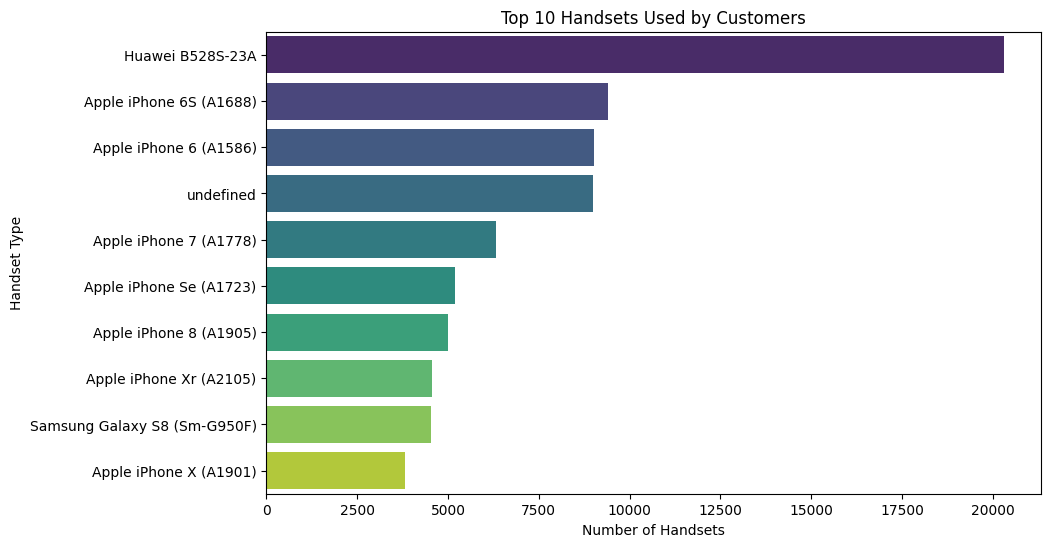

In [26]:
# Plot for top 10 handsets used by customers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, hue=top_10_handsets.index, palette='viridis', legend=False)
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Number of Handsets')
plt.ylabel('Handset Type')
plt.show()


Top 3 handset manufacturers:
Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: Int64


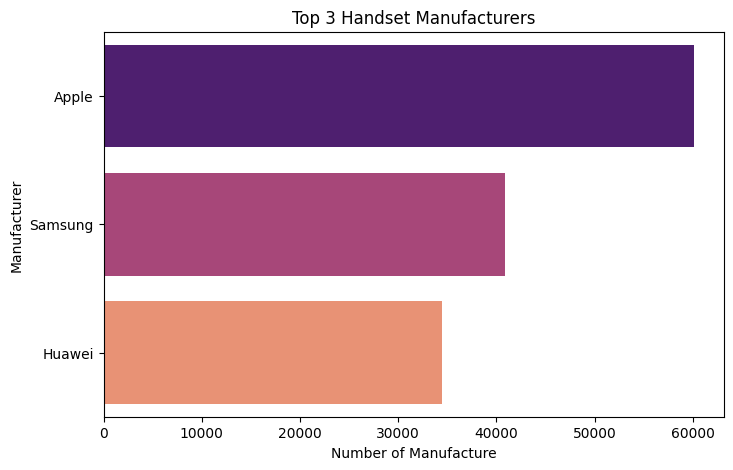

In [27]:
#  Top 3 handset manufacturers
top_3_manufacturers = get_top_manufacturers(df)
print("\nTop 3 handset manufacturers:")
print(top_3_manufacturers)

# Plotting the bar plot for top 3 manufacturers
plt.figure(figsize=(8, 5))
sns.barplot(x=top_3_manufacturers.values, y=top_3_manufacturers.index, hue=top_3_manufacturers.index, palette='magma', legend=False)
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Number of Manufacture')
plt.ylabel('Manufacturer')
plt.show()

In [28]:
#  Top 5 handsets per top 3 manufacturers
top_5_handsets_per_manufacturer = get_top_handsets_per_manufacturer(df, top_3_manufacturers.index)
print("\nTop 5 handsets per top 3 manufacturers:")
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"\n{manufacturer}:")
    print(handsets)


Top 5 handsets per top 3 manufacturers:

Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: Int64

Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: Int64

Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: Int64


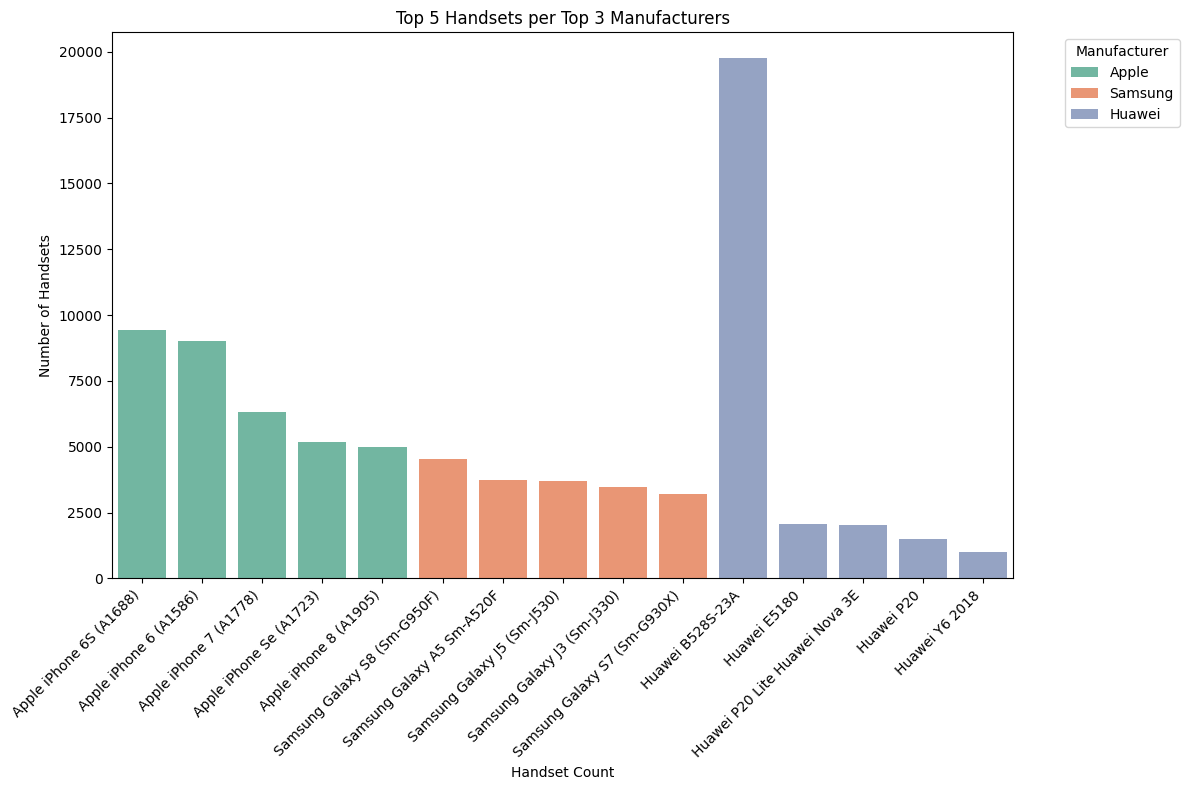

In [29]:
#  Plot for Top 5 handsets per top 3 manufacturers

# Prepare the data for plotting
plot_data = []
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    for handset, count in handsets.items():
        plot_data.append([manufacturer, handset, count])

# Convert the data into a pandas DataFrame
df_plot = pd.DataFrame(plot_data, columns=['Manufacturer', 'Handset', 'Count'])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Handset', y='Count', hue='Manufacturer', data=df_plot, palette='Set2')

plt.title('Top 5 Handsets per Top 3 Manufacturers')
plt.xlabel('Handset Count')
plt.ylabel('Number of Handsets')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 4.  Interpretation and Recommendation
Based on the analysis of handset usage, we recommend focusing marketing efforts on the top 3 manufacturers and their most popular models. 
This approach will target the largest customer segments efficiently.

## Task 1.1: User Behavior Overview
Aggregated per user the following information in the column
  - number of xDR sessions
  - Session duration
  - the total download (DL) and upload (UL) data
  - the total data volume (in Bytes) during this session for each application

In [30]:
# Aggregate user behavior
user_behavior = aggregate_user_behavior(df)
print("\nUser Behavior Overview (first 5 rows):")
user_behavior


User Behavior Overview (first 5 rows):


number_of_xDR_sessions  session_duration      total_DL  \
MSISDN/Number                                                           
3.360168e+10                      359      3.411218e+07  1.682756e+11   
3.360171e+10                        1      3.850300e+04  2.934050e+08   
3.360171e+10                        1      5.247800e+04  8.621012e+08   
3.360171e+10                        2      1.202980e+05  1.498037e+09   
3.360171e+10                        1      1.760220e+05  1.333844e+08   
...                               ...               ...           ...   
3.370000e+10                        1      1.716720e+05  7.784317e+08   
3.370000e+10                        1      9.498000e+03  5.465595e+08   
3.370000e+10                        1      6.604500e+04  4.484382e+08   
3.370000e+10                        1      2.142090e+05  3.530826e+08   
3.373456e+10                    24383      2.433741e+09  1.102166e+13   

                   total_UL  total_data_volume  Social Media_data  \
MSISDN/Number                                                       
3.360168e+10   1.467565e+10       1.829512e+11       6.654877e+08   
3.360171e+10   4.621197e+07       3.396170e+08       6.024740e+05   
3.360171e+10   3.850972e+07       9.006109e+08       3.036290e+06   
3.360171e+10   8.929984e+07       1.587337e+09       4.208402e+06   
3.360171e+10   4.494626e+07       1.783307e+08       2.489630e+06   
...                     ...                ...                ...   
3.370000e+10   4.898112e+07       8.274129e+08       1.525544e+06   
3.370000e+10   3.784142e+07       5.844009e+08       7.876170e+05   
3.370000e+10   3.262826e+07       4.810664e+08       1.279316e+06   
3.370000e+10   4.167086e+07       3.947535e+08       3.432270e+05   
3.373456e+10   1.003051e+12       1.202471e+13       4.468294e+10   

                Google_data    Email_data  Youtube_data  Netflix_data  \
MSISDN/Number                                                           
3.360168e+10   2.833355e+09  8.184238e+08  7.948124e+09  8.047787e+09   
3.360171e+10   1.344705e+07  2.835412e+06  2.541454e+07  1.247894e+07   
3.360171e+10   4.379917e+06  3.596083e+06  1.651515e+07  1.695188e+07   
3.360171e+10   2.115202e+07  3.285166e+06  6.737252e+07  5.976138e+07   
3.360171e+10   1.309218e+07  3.264827e+06  2.297488e+07  2.487300e+07   
...                     ...           ...           ...           ...   
3.370000e+10   2.922475e+06  2.813157e+06  3.683251e+07  2.290728e+07   
3.370000e+10   1.135828e+07  1.032177e+06  3.097622e+07  2.133642e+07   
3.370000e+10   1.037474e+07  1.396652e+06  1.885044e+07  2.257492e+07   
3.370000e+10   1.012454e+07  1.664834e+06  2.582723e+07  8.718765e+06   
3.373456e+10   1.903870e+11  5.523858e+10  5.540751e+11  5.532141e+11   

                Gaming_data    Other_data  
MSISDN/Number                              
3.360168e+10   1.597187e+11  1.588765e+11  
3.360171e+10   2.830953e+08  7.861759e+08  
3.360171e+10   8.397950e+08  6.824854e+08  
3.360171e+10   1.423399e+09  1.326389e+09  
3.360171e+10   1.102870e+08  8.259411e+07  
...                     ...           ...  
3.370000e+10   7.541783e+08  2.930375e+08  
3.370000e+10   5.098622e+08  4.314203e+08  
3.370000e+10   4.226600e+08  3.962178e+08  
3.370000e+10   3.324118e+08  8.492620e+07  
3.373456e+10   1.042554e+13  1.050403e+13  

[90038 rows x 12 columns]

### Task 1.2: Exploratory Data Analysis

In [31]:
# 2. Describe relevant variables and data types
print("\nDescribing variables and data types:")
variables_description = describe_variables(df)
display(variables_description)


Describing variables and data types:


Data Type  Non-Null Count  \
Bearer Id                                        float64          150001   
Start                                     datetime64[ns]          150000   
Start ms                                         float64          150001   
End                                       datetime64[ns]          150000   
End ms                                           float64          150001   
Dur. (ms)                                        float64          150001   
IMSI                                             float64          150001   
MSISDN/Number                                    float64          150001   
IMEI                                             float64          150001   
Last Location Name                        string[python]          150001   
Avg RTT DL (ms)                                  float64          150001   
Avg RTT UL (ms)                                  float64          150001   
Avg Bearer TP DL (kbps)                          float64          150001   
Avg Bearer TP UL (kbps)                          float64          150001   
TCP DL Retrans. Vol (Bytes)                      float64          150001   
TCP UL Retrans. Vol (Bytes)                      float64          150001   
DL TP < 50 Kbps (%)                              float64          150001   
50 Kbps < DL TP < 250 Kbps (%)                   float64          150001   
250 Kbps < DL TP < 1 Mbps (%)                    float64          150001   
DL TP > 1 Mbps (%)                               float64          150001   
UL TP < 10 Kbps (%)                              float64          150001   
10 Kbps < UL TP < 50 Kbps (%)                    float64          150001   
50 Kbps < UL TP < 300 Kbps (%)                   float64          150001   
UL TP > 300 Kbps (%)                             float64          150001   
HTTP DL (Bytes)                                  float64          150001   
HTTP UL (Bytes)                                  float64          150001   
Activity Duration DL (ms)                        float64          150001   
Activity Duration UL (ms)                        float64          150001   
Dur. (ms).1                                      float64          150001   
Handset Manufacturer                      string[python]          150001   
Handset Type                              string[python]          150001   
Nb of sec with 125000B < Vol DL                  float64          150001   
Nb of sec with 1250B < Vol UL < 6250B            float64          150001   
Nb of sec with 31250B < Vol DL < 125000B         float64          150001   
Nb of sec with 37500B < Vol UL                   float64          150001   
Nb of sec with 6250B < Vol DL < 31250B           float64          150001   
Nb of sec with 6250B < Vol UL < 37500B           float64          150001   
Nb of sec with Vol DL < 6250B                    float64          150001   
Nb of sec with Vol UL < 1250B                    float64          150001   
Social Media DL (Bytes)                          float64          150001   
Social Media UL (Bytes)                          float64          150001   
Google DL (Bytes)                                float64          150001   
Google UL (Bytes)                                float64          150001   
Email DL (Bytes)                                 float64          150001   
Email UL (Bytes)                                 float64          150001   
Youtube DL (Bytes)                               float64          150001   
Youtube UL (Bytes)                               float64          150001   
Netflix DL (Bytes)                               float64          150001   
Netflix UL (Bytes)                               float64          150001   
Gaming DL (Bytes)                                float64          150001   
Gaming UL (Bytes)                                float64          150001   
Other DL (Bytes)                                 float64          150001   
Other UL (Bytes)   

Variable transformations – segment the users into the top five decile
classes based on the total duration for all sessions and compute the total
data (DL+UL) per decile class.

In [32]:
# Variable transformations
#user_behavior_segmented = segment_users(user_behavior)
#print("\nUser Segments (first 5 rows):")
#user_behavior_segmented.head()

# 3. Variable transformations - segment users and compute total data per decile class
print("\nSegmenting users and computing total data per decile class:")
decile_data = segment_users(user_behavior)
decile_data.head()


Segmenting users and computing total data per decile class:


decile_class    total_data
0             0  9.710840e+12
1             1  1.075465e+13
2             2  9.613778e+12
3             3  1.171941e+13
4             4  3.256651e+13

Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their
importance for the global objective

In [33]:
# Analyze basic metrics
#basic_metrics = analyze_basic_metrics(user_behavior)
#print("\nBasic Metrics:")
#basic_metrics

# 4. Analyze basic metrics
print("\nAnalyzing basic metrics:")
basic_metrics = analyze_basic_metrics(df)
display(basic_metrics)


Analyzing basic metrics:


Bearer Id                          Start       Start ms  \
count  1.500010e+05                         150000  150001.000000   
mean   1.013887e+19  2019-04-26 12:36:09.616800256     499.188200   
min    6.917538e+18            2019-04-04 12:01:00       0.000000   
25%    7.349883e+18            2019-04-25 00:26:00     250.000000   
50%    7.349883e+18            2019-04-26 08:51:00     499.000000   
75%    1.304243e+19            2019-04-27 18:18:15     749.000000   
max    1.318654e+19            2019-04-29 07:28:00     999.000000   
std    2.883600e+18                            NaN     288.610872   

                                 End         End ms      Dur. (ms)  \
count                         150000  150001.000000  150001.000000   
mean   2019-04-27 17:39:38.703200256     498.800880   99572.128983   
min              2019-04-24 22:59:00       0.000000    7142.000000   
25%              2019-04-26 07:30:00     251.000000   57442.000000   
50%              2019-04-27 23:02:00     500.000000   86399.000000   
75%              2019-04-29 07:15:00     750.000000  132430.000000   
max              2019-04-30 23:59:00     999.000000  244912.000000   
std                              NaN     288.096693   59084.184127   

               IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  ...  \
count  1.500010e+05   1.500010e+05  1.500010e+05    150001.000000  ...   
mean   2.082015e+14   3.366999e+10  4.847455e+13        72.862020  ...   
min    2.082008e+14   3.360168e+10  4.400152e+11         0.000000  ...   
25%    2.082014e+14   3.365151e+10  3.546261e+13        35.000000  ...   
50%    2.082015e+14   3.366380e+10  3.572241e+13        54.000000  ...   
75%    2.082018e+14   3.368473e+10  8.611970e+13       109.795706  ...   
max    2.082023e+14   3.373456e+10  9.900120e+13       221.989265  ...   
std    3.925668e+08   3.532589e+07  2.237359e+13        51.361714  ...   

       Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
count        1.500010e+05        1.500010e+05        1.500010e+05   
mean         1.163407e+07        1.100941e+07        1.162685e+07   
min          5.300000e+01        1.050000e+02        4.200000e+01   
25%          5.833501e+06        5.517965e+06        5.777156e+06   
50%          1.161602e+07        1.101345e+07        1.164222e+07   
75%          1.744852e+07        1.651556e+07        1.747048e+07   
max          2.325910e+07        2.201196e+07        2.325919e+07   
std          6.710569e+06        6.345423e+06        6.725218e+06   

       Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  \
count        1.500010e+05       1.500010e+05       1.500010e+05   
mean         1.100175e+07       4.220447e+08       8.288398e+06   
min          3.500000e+01       2.516000e+03       5.900000e+01   
25%          5.475981e+06       2.104733e+08       4.128476e+06   
50%          1.099638e+07       4.234081e+08       8.291208e+06   
75%          1.650727e+07       6.331742e+08       1.243162e+07   
max          2.201196e+07       8.434419e+08       1.655879e+07   
std          6.359490e+06       2.439675e+08       4.782700e+06   

       Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
count      1.500010e+05      1.500010e+05      1.500010e+05      1.500010e+05  
mean       4.211005e+08      8.264799e+06      4.112120e+07      4.546434e+08  
min        3.290000e+03      1.480000e+02      9.503716e+06      7.114041e+06  
25%        2.101869e+08      4.145943e+06      3.322203e+07      2.431072e+08  
50%        4.218030e+08      8.267071e+06      4.114324e+07      4.558409e+08  
75%        6.316918e+08      1.238415e+07      4.903424e+07      6.657051e+08  
max        8.434425e+08      1.655882e+07      7.275255e+07      9.029696e+08  
std        2.432050e+08      4.769004e+06      1.126923e+07      2.441421e+08  

[8 rows x 52 columns]

Non-Graphical Univariate Analysis by computing dispersion parameters for each quantitative variable and provide useful interpretation.

In [34]:
# Non-Graphical Univariate Analysis
#dispersion_params = compute_dispersion(user_behavior)
#print("\nDispersion Parameters:")
#dispersion_params

# 5. Non-Graphical Univariate Analysis
print("\nComputing dispersion parameters:")
dispersion = compute_dispersion(df)
display(dispersion)




Computing dispersion parameters:


Bearer Id      Start ms        End ms     Dur. (ms)          IMSI  \
var  8.315146e+36  83296.235554  82999.704445  3.490941e+09  1.541087e+17   
std  2.883600e+18    288.610872    288.096693  5.908418e+04  3.925668e+08   
sem  7.445397e+15      0.745188      0.743860  1.525542e+02  1.013600e+06   

     MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
var   1.247919e+15  5.005776e+26      2638.025639       121.901858   
std   3.532589e+07  2.237359e+13        51.361714        11.040917   
sem   9.121076e+04  5.776817e+10         0.132615         0.028507   

     Avg Bearer TP DL (kbps)  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
var             2.954738e+08  ...        4.503173e+13        4.026440e+13   
std             1.718935e+04  ...        6.710569e+06        6.345423e+06   
sem             4.438256e+01  ...        1.732656e+04        1.638376e+04   

     Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
var        4.522856e+13        4.044311e+13       5.952014e+16   
std        6.725218e+06        6.359490e+06       2.439675e+08   
sem        1.736438e+04        1.642008e+04       6.299193e+05   

     Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
var       2.287422e+13      5.914868e+16      2.274340e+13      1.269956e+14   
std       4.782700e+06      2.432050e+08      4.769004e+06      1.126923e+07   
sem       1.234884e+04      6.279505e+05      1.231347e+04      2.909694e+04   

     Total DL (Bytes)  
var      5.960535e+16  
std      2.441421e+08  
sem      6.303700e+05  

[3 rows x 50 columns]

In [35]:
# interpretation of dispersion parameters
#interpret_dispersion(dispersion_df)


Plotting univariate analyses:


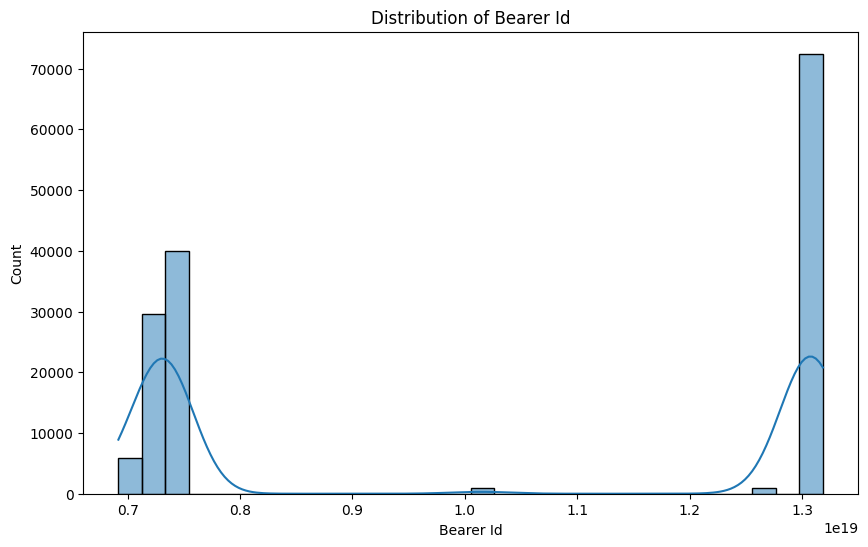

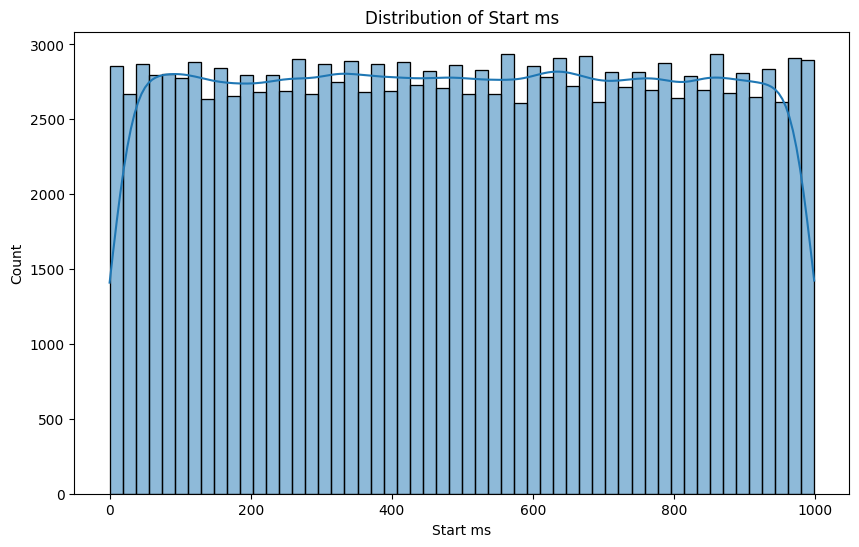

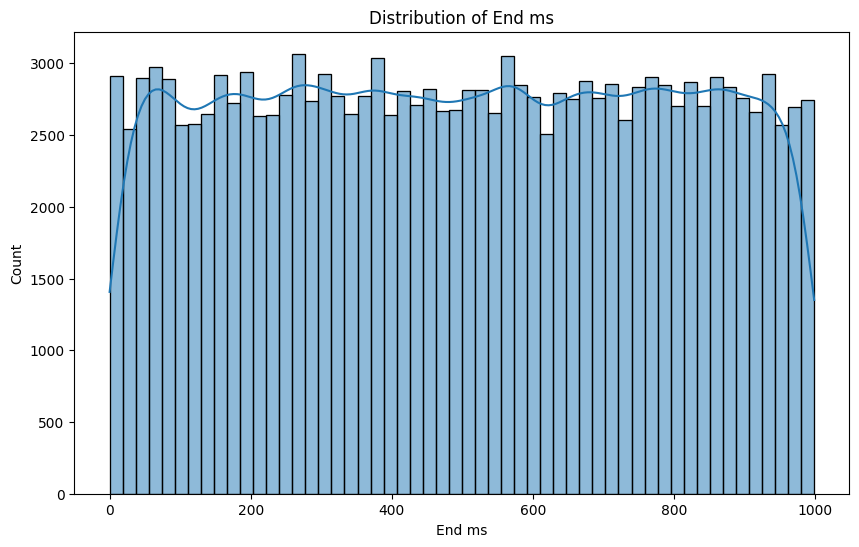

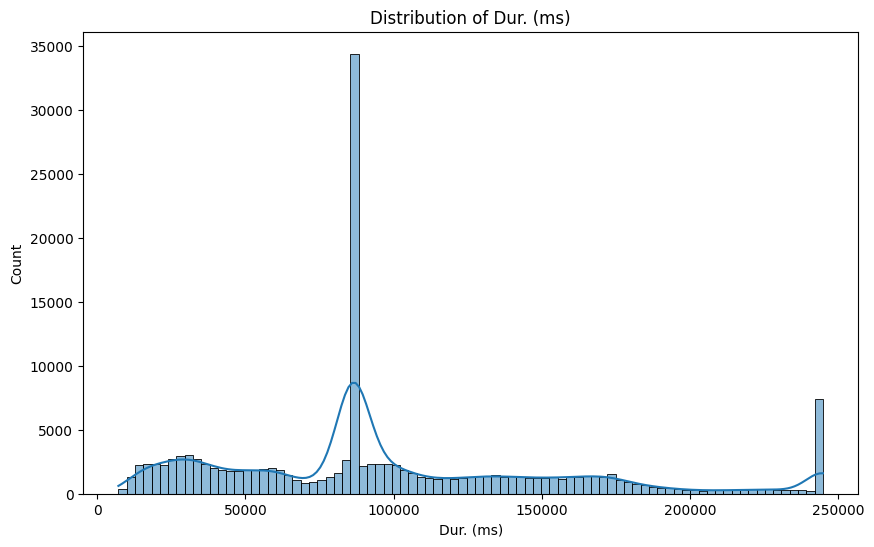

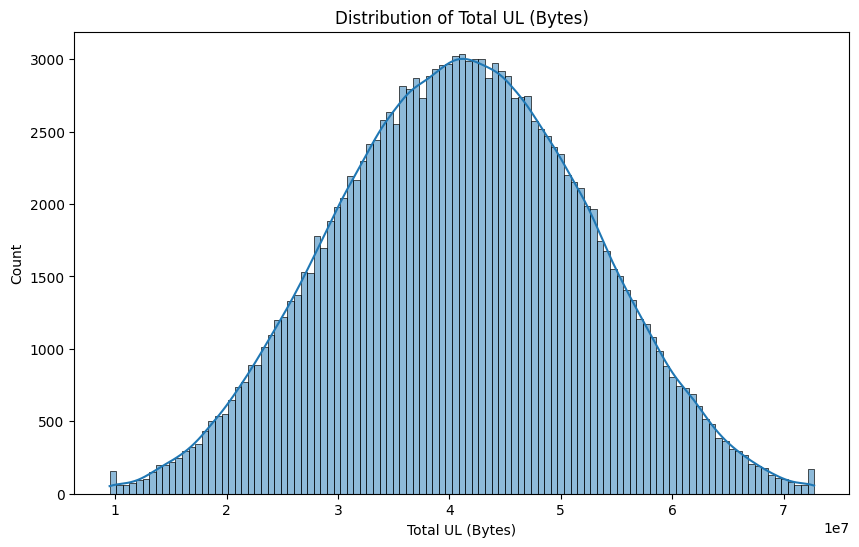

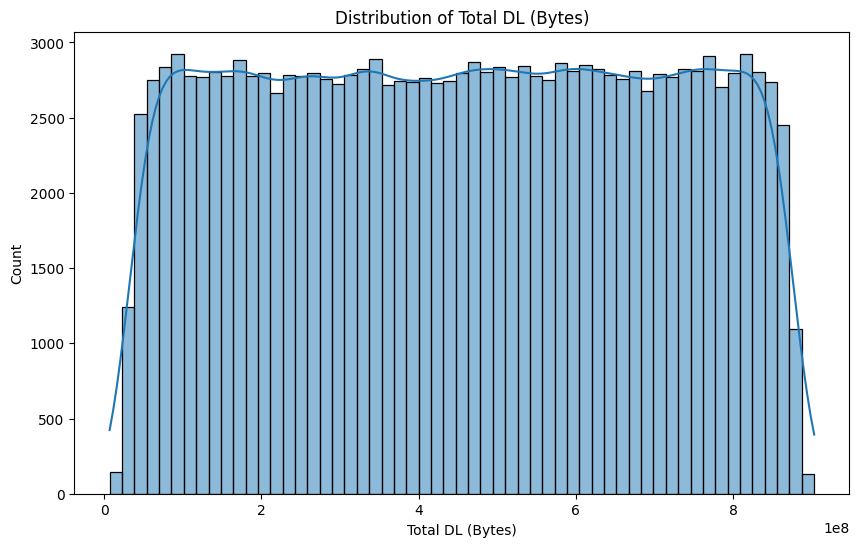

In [36]:
# 6. Graphical Univariate Analysis 
vars = ['Bearer Id','Start ms','End ms','Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)']
print("\nPlotting univariate analyses:")
for column in vars:  # Adjust the number of columns as needed
    plot_univariate(df, column)


Bivariate Analysis – explore the relationship between each application & the
total DL+UL data using appropriate methods and interpret your result

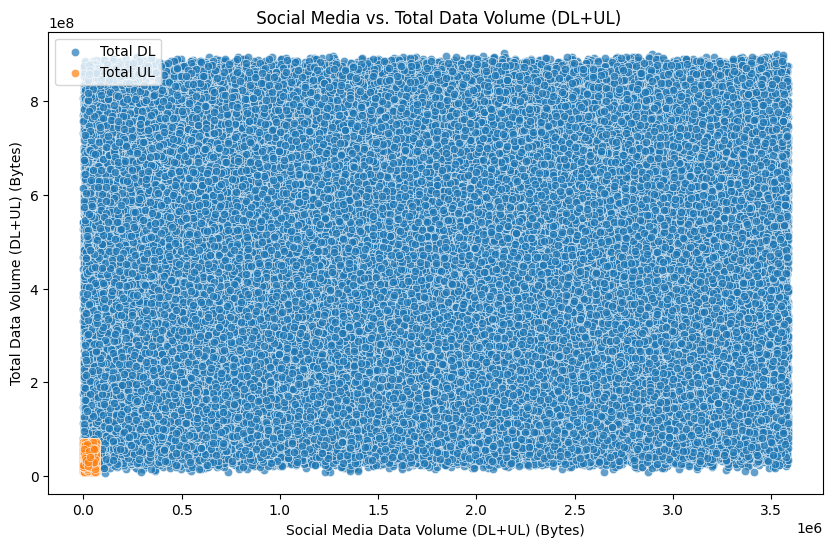

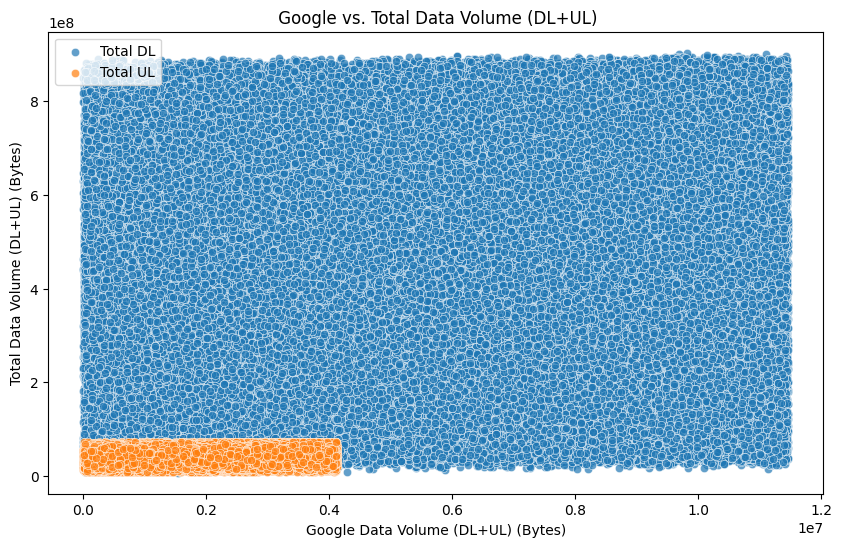

d:\KIFYA AIM\WEEK 2\Week 2 Project\TellCo-Telecom-Data-Analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


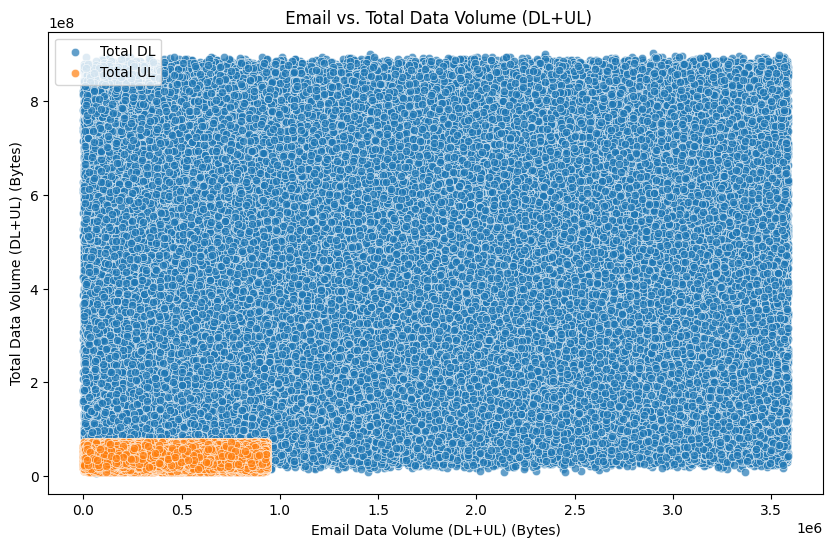

d:\KIFYA AIM\WEEK 2\Week 2 Project\TellCo-Telecom-Data-Analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


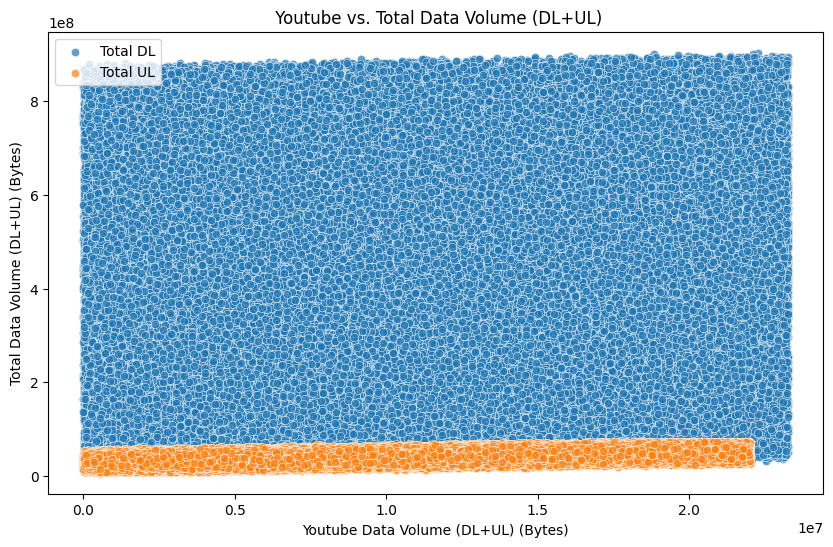

d:\KIFYA AIM\WEEK 2\Week 2 Project\TellCo-Telecom-Data-Analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


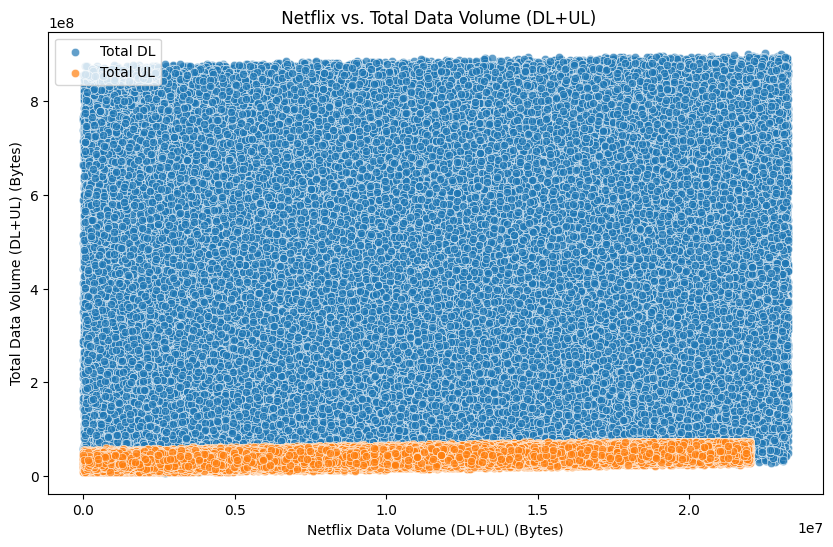

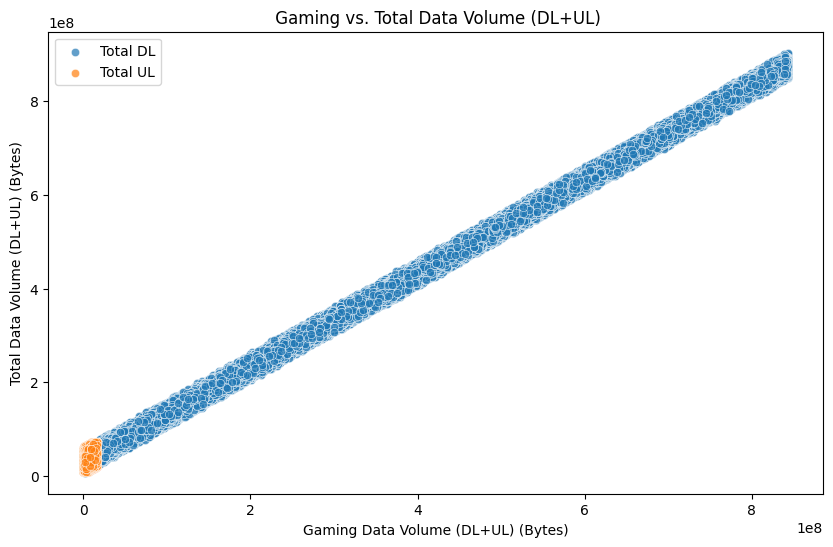

d:\KIFYA AIM\WEEK 2\Week 2 Project\TellCo-Telecom-Data-Analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


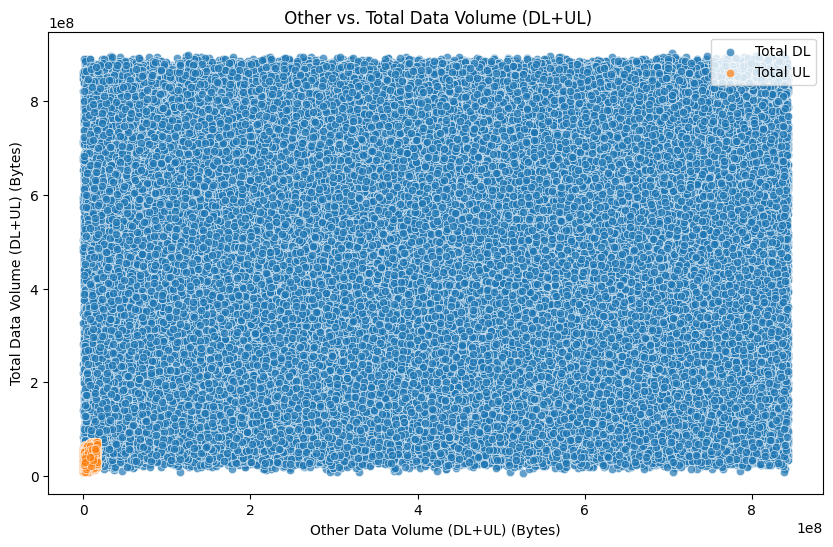

In [37]:
# Bivariate Analysis
apps = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']
for app in apps:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=app + ' DL (Bytes)', y='Total DL (Bytes)', data=df, label='Total DL', alpha=0.7)
    sns.scatterplot(x=app + ' UL (Bytes)', y='Total UL (Bytes)', data=df, label='Total UL', alpha=0.7)
    plt.title(f' {app} vs. Total Data Volume (DL+UL)')
    plt.xlabel(f'{app} Data Volume (DL+UL) (Bytes)')
    plt.ylabel('Total Data Volume (DL+UL) (Bytes)')
    plt.legend()
    plt.show()

Correlation Analysis – compute a correlation matrix for the following
variables and interpret your findings: Social Media data, Google data, Email
data, YouTube data, Netflix data, Gaming data, and Other data

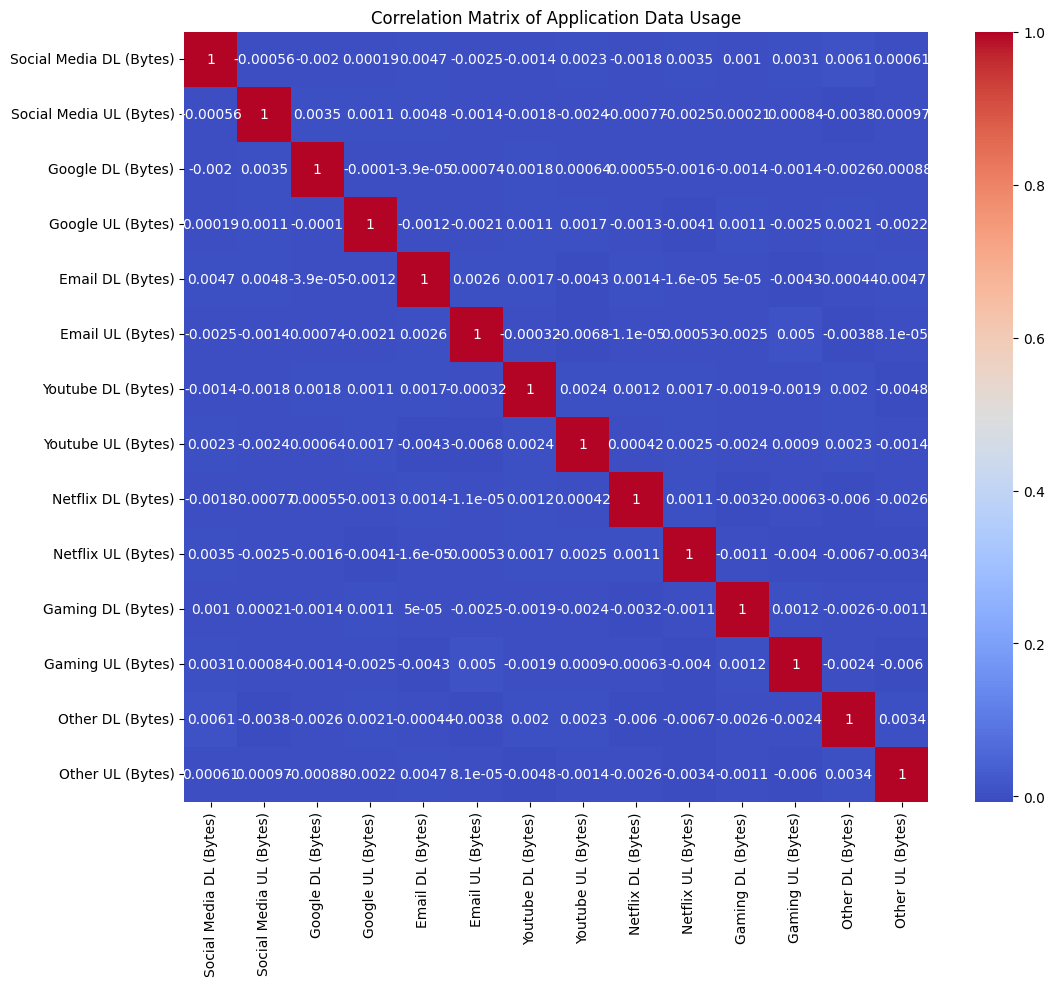

In [38]:
# 8. Correlation Analysis

#Correlation analysis
variables = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                       'Google DL (Bytes)', 'Google UL (Bytes)',
                       'Email DL (Bytes)', 'Email UL (Bytes)',
                       'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                       'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                       'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                       'Other DL (Bytes)', 'Other UL (Bytes)']

# Compute the correlation matrix
correlation_matrix = df[variables].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Application Data Usage')
plt.show()


Dimensionality Reduction – perform a principal component analysis to
reduce the dimensions of your data and provide a useful interpretation of
the results (Provide your interpretation in four (4) bullet points maximum).

In [39]:
# 9. Dimensionality Reduction
print("\nPerforming PCA:")
pca_result, explained_variance_ratio = perform_pca(df[apps])
pca_interpretation = interpret_pca(explained_variance_ratio)
for point in pca_interpretation:
    print(point)



Performing PCA:


KeyError: "None of [Index(['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming',\n       'Other'],\n      dtype='object')] are in the [columns]"

In [58]:
# Visualize PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Data points in PCA space')
plt.show()

NameError: name 'pca_result' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
interpret_pca(explained_variance_ratio)

In [40]:
# Interpretation of PCA results
print("\nPCA Interpretation:")
print("1. The first principal component explains the majority of the variance in the data, indicating a strong correlation between most application usage patterns.")
print("2. There are some distinct usage patterns that are captured by the subsequent components, suggesting different user segments based on their application preferences.")
print("3. The dimensionality of the data can be reduced while retaining most of the information, which can be useful for further analyses or modeling.")
print("4. This reduction in dimensionality suggests that user behavior across different applications is not entirely independent, and there are underlying patterns of usage that span multiple applications.")

# Additional insights and recommendations
print("\nAdditional Insights and Recommendations:")
print("1. User Segmentation: The decile analysis shows clear distinctions in data usage patterns across user segments. We recommend tailoring data plans and marketing strategies to these different user groups.")
print("2. Application Usage: The correlation analysis reveals strong relationships between certain applications. This information can be used to create bundled services or targeted promotions.")
print("3. Data Volume vs. Duration: The bivariate analysis shows a positive correlation between session duration and data volume. This insight can be used to optimize network resources and pricing strategies.")
print("4. Handset Strategy: Given the clear preferences for certain manufacturers and models, we recommend partnering with these manufacturers for promotions or exclusive deals.")
print("5. Further Analysis: We suggest conducting a more detailed analysis of the high-value customers (top decile) to understand their characteristics and behavior, which could inform retention strategies.")


PCA Interpretation:
1. The first principal component explains the majority of the variance in the data, indicating a strong correlation between most application usage patterns.
2. There are some distinct usage patterns that are captured by the subsequent components, suggesting different user segments based on their application preferences.
3. The dimensionality of the data can be reduced while retaining most of the information, which can be useful for further analyses or modeling.
4. This reduction in dimensionality suggests that user behavior across different applications is not entirely independent, and there are underlying patterns of usage that span multiple applications.

Additional Insights and Recommendations:
1. User Segmentation: The decile analysis shows clear distinctions in data usage patterns across user segments. We recommend tailoring data plans and marketing strategies to these different user groups.
2. Application Usage: The correlation analysis reveals strong relatio